In [1]:
import pandas as pd
df=pd.read_csv("survey_responses.csv")
df2=pd.read_csv("survey_questions_meta.csv")

In [2]:
'''
print(df.info())
print(df.isnull().sum())
print(df2.info())
print(df2.isnull().sum())
'''

'\nprint(df.info())\nprint(df.isnull().sum())\nprint(df2.info())\nprint(df2.isnull().sum())\n'

In [3]:
import statistics as st
import math as m
i=st.mean(df["Q7-How much effort do you make to interact with others ?"].dropna())
k=m.floor(i)
for j in (df["Q7-How much effort do you make to interact with others ?"].isna()):
    if(j==True):
        df["Q7-How much effort do you make to interact with others ?"].fillna(value=k,inplace=True) 
    else:
        pass

In [3]:
i=st.mean(df["Q8-About How events are you aware about ?"].dropna())
k=m.floor(i)
for j in (df["Q8-About How events are you aware about ?"].isna()):
    if(j==True):
        df["Q8-About How events are you aware about ?"].fillna(value=k,inplace=True) 
    else:
        pass

In [4]:
#df.drop(["Q9-What is an ideal student life ?"],axis=1,inplace=True)
useful_info=["Q5-Stressed about Adjustment issues",       
"Q5-Stressed about Academic issues",                                                                                                
"Q5-Stressed about Financial issues",                                                                                               
"Q5-Stressed about Family issues",                                                                                                  
"Q5-Stressed about Friendships",                                                                                                    
"Q5-Stressed about Romantic relationships",                                                                                       
"Q5-Stressed about  Health related issues",                                                                                         
"Q5-Stressed about Career related issues",                                                                                        
"Q5-Stressed about My involvement in hostel, clubs, societies, interest groups, etc.",                                              
"Q4-Passionate about Animal welfare",                                                                                              
"Q4-Passionate about Arts/Culture/Heritage",                                                                                        
"Q4-Passionate about Children/Youth",                                                                                               
"Q4-Passionate about Community building",                                                                                         
"Q4-Passionate about Diversity & Inclusion (e.g. special needs, migrant worker, interfaith and intercultural understanding)",     
"Q4-Passionate about Environmental sustainability",                                                                                
"Q4-Passionate about Families",                                                                                                     
"Q4-Passionate about Health/Well-being (e.g mental health)",                                                                                                                                                                              
"Q4-Passionate about Poverty reduction",                                                                                          
"Q4-Passionate about Education"]
factors=dict()
for i in useful_info:
    factors[i]=df2[i]
df_factors= pd.DataFrame (factors, columns = factors.keys())

In [40]:
#print(df.info())
#print(df.isnull().sum())
#print(df_factors.info())
#print(df_factors.head(5))

In [5]:
#check if all the reponse ids match
check=[]
for i,j in zip(df,df_factors):
    if(i==j):
        check.append(True)
print(all(check))

True


In [6]:
#add new colums to df
for i in useful_info:
    df[i]=df2[i]

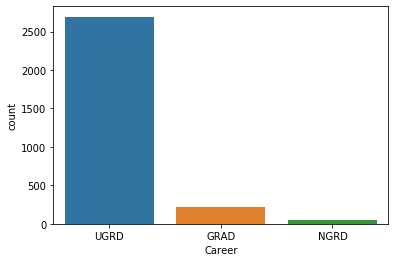

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Career', data=df)
plt.show()

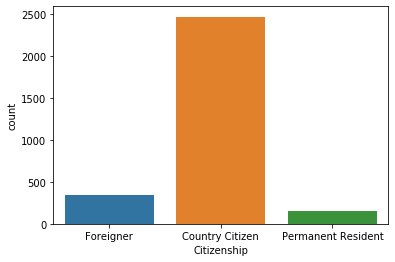

In [45]:
sns.countplot(x='Citizenship', data=df)
plt.show()

From the above graph we see that there are more students who have got the country citizenship to study in a particular country and interestingly there are lesser students who are permanent residents than foreigners.

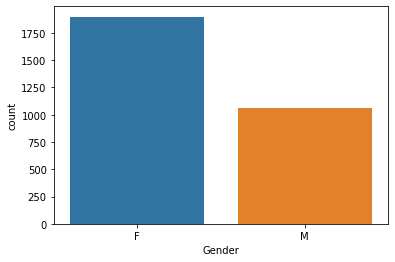

In [46]:
sns.countplot(x='Gender', data=df)

We see that there are more females who filled the form than males, this can bring some bias in the results.

{'Singapore': 2467, 'China': 158, 'Malaysia': 130, 'India': 47, 'Indonesia': 39, 'Viet Nam': 20, 'Canada': 17, 'United States': 15, 'Taiwan': 13, 'Korea, Republic of': 10}


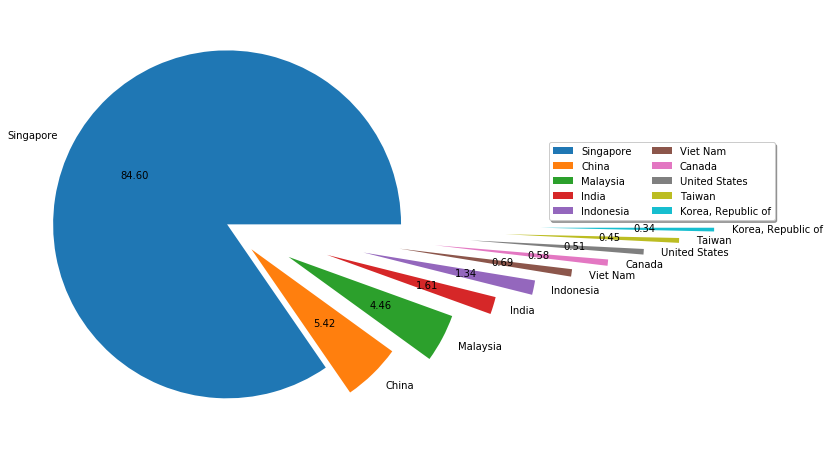

In [47]:
d={}
for i in df['Nationality']:
    if i in d:
        d[i]+=1
    else:
        d[i]=1
sorted_d = sorted(d.items() ,reverse=True,  key=lambda x: x[1])
sorted_d=dict(sorted_d[0:10])
print(sorted_d)
explode=[]
p=0
for i in sorted_d:
    explode.append(p)
    p+=0.2

#plot the pie chart
fig, ax = plt.subplots(figsize =(10, 8)) 
ax.pie(sorted_d.values(), labels =sorted_d.keys(),autopct="%.2f",explode = explode) 
ax.legend(loc='upper center', bbox_to_anchor=(1.5,0.7),shadow=True, ncol=2)
plt.show()

We see that many students choose Singapore as a study abroad country comapred to others, there can also be a possibility that the survey was conducted in Singapore.

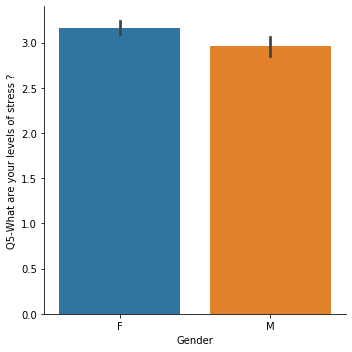

In [48]:
sns.catplot(x='Gender',y='Q5-What are your levels of stress ?',data=df,kind='bar')  # to make bar graph
plt.show()

We see that females are more stressed than males, but considering the bias that more of females have filled the form than males, we can approximately say that both malesand females have same amount of stress.

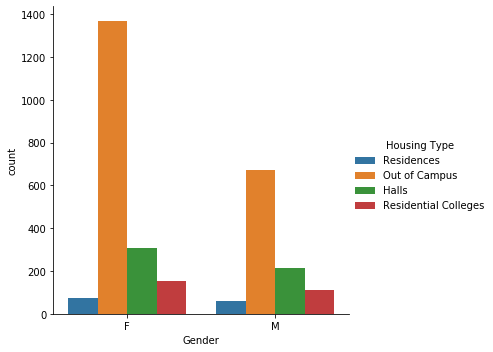

In [49]:
sns.catplot(x="Gender", hue="Housing Type", kind="count", data=df)

This graph gives insights about the housing type and we see mostly the students prefer to stay out of campus and possibly the reason being that the food or environment in hostel rooms.

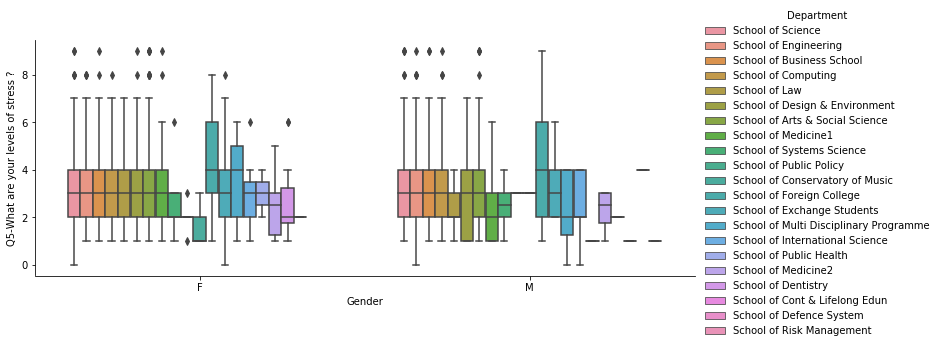

In [50]:
sns.catplot(x="Gender", y="Q5-What are your levels of stress ?", hue="Department", kind="box", data=df,height=4, aspect=2.5)

In this we are trying to plot the levels of stress with repsect to the departments and we see that "School of Multi Disciplinary Programme" and "School of exchange students" have more stress than others.

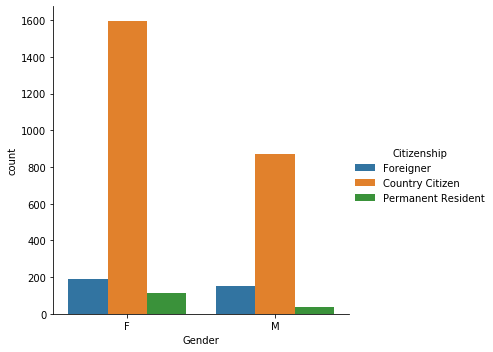

In [51]:
sns.catplot(x="Gender", hue="Citizenship", kind="count", data=df)

In [52]:
f={}
m={}
for i,j in zip(df['Citizenship'],df["Gender"]):
    if j=="F":
        if i in f:
            f[i]+=1
        else:
            f[i]=1
    else:
        if i in m:
            m[i]+=1
        else:
            m[i]=1
print(f,m)

{'Foreigner': 191, 'Country Citizen': 1596, 'Permanent Resident': 112} {'Foreigner': 152, 'Country Citizen': 871, 'Permanent Resident': 36}


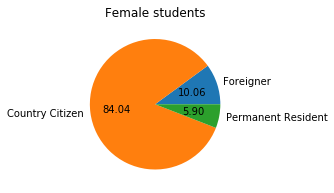

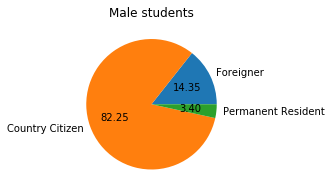

In [53]:
fig, ax = plt.subplots(figsize =(5, 3)) 
ax.pie(f.values(), labels =f.keys(),autopct="%.2f")
plt.title("Female students")
plt.show()
fig, ax = plt.subplots(figsize =(5, 3)) 
ax.pie(m.values(), labels =m.keys(),autopct="%.2f")
plt.title("Male students")
plt.show()

This graph tells us that more females go abroad to persue graduation or undergraduation, but this is due to the bias in the dataset.

In [10]:
stress_info=["Q5-Stressed about Adjustment issues",       
"Q5-Stressed about Academic issues",                                                                                                
"Q5-Stressed about Financial issues",                                                                                               
"Q5-Stressed about Family issues",                                                                                                  
"Q5-Stressed about Friendships",                                                                                                    
"Q5-Stressed about Romantic relationships",                                                                                       
"Q5-Stressed about  Health related issues",                                                                                         
"Q5-Stressed about Career related issues",                                                                                        
"Q5-Stressed about My involvement in hostel, clubs, societies, interest groups, etc."]
stress_factors_count={}
for i in stress_info:
    stress_factors_count[i]=df[i].eq("Yes").sum()
print(stress_factors_count)

{'Q5-Stressed about Adjustment issues': 907, 'Q5-Stressed about Academic issues': 2728, 'Q5-Stressed about Financial issues': 1142, 'Q5-Stressed about Family issues': 436, 'Q5-Stressed about Friendships': 798, 'Q5-Stressed about Romantic relationships': 490, 'Q5-Stressed about  Health related issues': 447, 'Q5-Stressed about Career related issues': 1346, 'Q5-Stressed about My involvement in hostel, clubs, societies, interest groups, etc.': 811}


We note that stress due to academic issues is more than anyother form of stress.

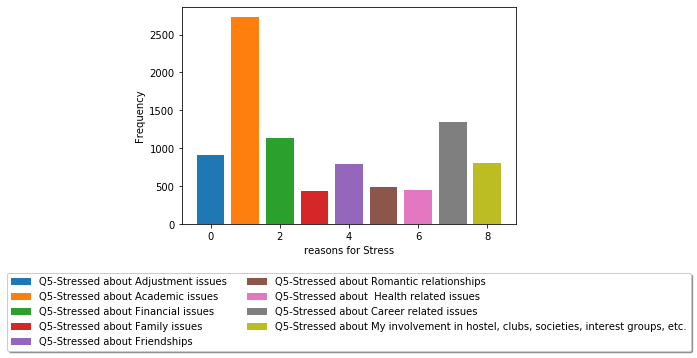

In [56]:
ax = plt.subplot(1,1,1)
k=0
for i,j in zip(stress_factors_count.values(),stress_factors_count.keys()):
    ax.bar(k,i,label=j)
    k+=1
plt.legend()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),shadow=True, ncol=2)
plt.xlabel('reasons for Stress')
plt.ylabel('Frequency')
plt.show()

This is the graphical representation of the above statement.

In [57]:
passion_info=["Q4-Passionate about Animal welfare",                                                                                              
"Q4-Passionate about Arts/Culture/Heritage",                                                                                        
"Q4-Passionate about Children/Youth",                                                                                               
"Q4-Passionate about Community building",                                                                                         
"Q4-Passionate about Diversity & Inclusion (e.g. special needs, migrant worker, interfaith and intercultural understanding)",     
"Q4-Passionate about Environmental sustainability",                                                                                
"Q4-Passionate about Families",                                                                                                     
"Q4-Passionate about Health/Well-being (e.g mental health)",                                                                                                                                                                              
"Q4-Passionate about Poverty reduction",                                                                                          
"Q4-Passionate about Education"]
passion_factors_count={}
for i in passion_info:
    passion_factors_count[i]=df[i].eq("Yes").sum()
print(passion_factors_count)

{'Q4-Passionate about Animal welfare': 1053, 'Q4-Passionate about Arts/Culture/Heritage': 1087, 'Q4-Passionate about Children/Youth': 1118, 'Q4-Passionate about Community building': 735, 'Q4-Passionate about Diversity & Inclusion (e.g. special needs, migrant worker, interfaith and intercultural understanding)': 624, 'Q4-Passionate about Environmental sustainability': 817, 'Q4-Passionate about Families': 575, 'Q4-Passionate about Health/Well-being (e.g mental health)': 1006, 'Q4-Passionate about Poverty reduction': 672, 'Q4-Passionate about Education': 1082}


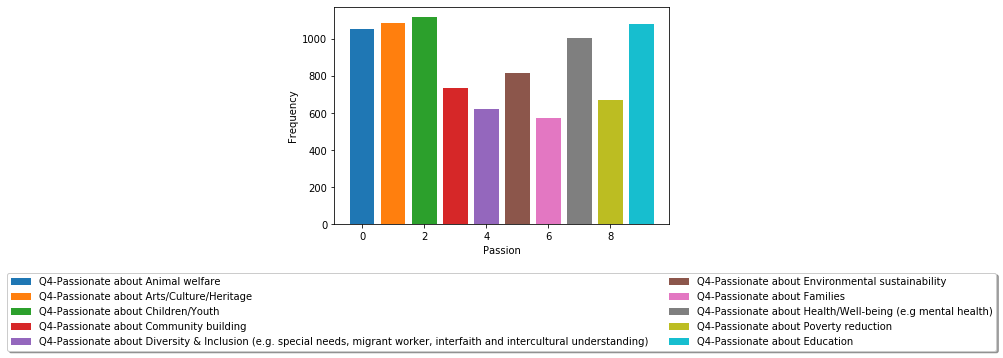

In [58]:
ax = plt.subplot(1,1,1)
k=0
for i,j in zip(passion_factors_count.values(),passion_factors_count.keys()):
    ax.bar(k,i,label=j)
    k+=1
plt.legend()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),shadow=True, ncol=2)
plt.xlabel('Passion')
plt.ylabel('Frequency')
plt.show()

Students are more passionate about their youth and almost equally passionate about arts,culture, animal welfare. This can be thought of as, as a child or youth a student doesn't undergo as much as stress as they undergo in their graduation or undergrad, thus they tend to get passionate about youth/children.

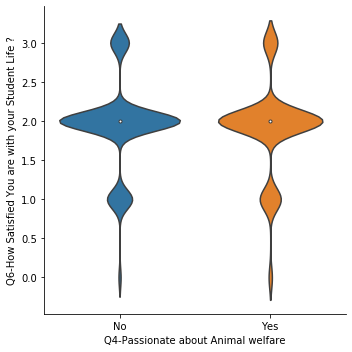

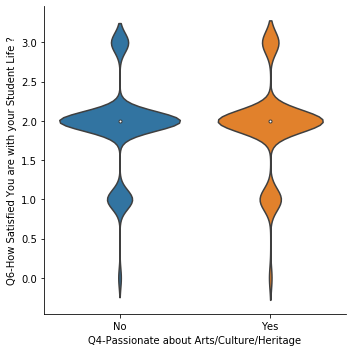

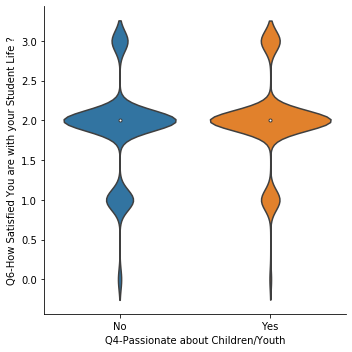

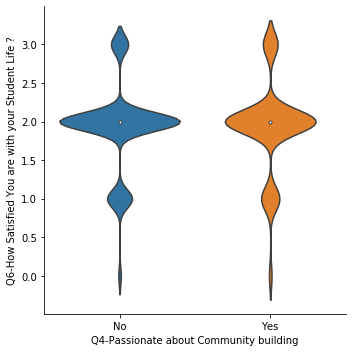

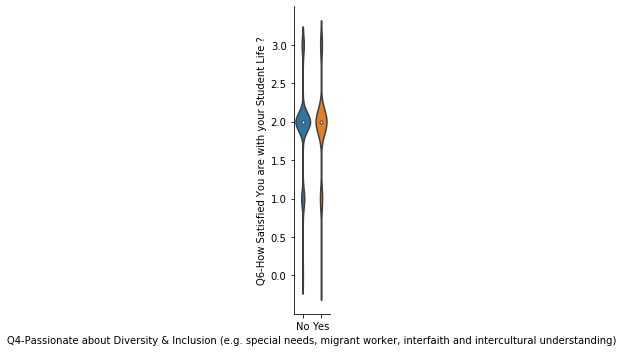

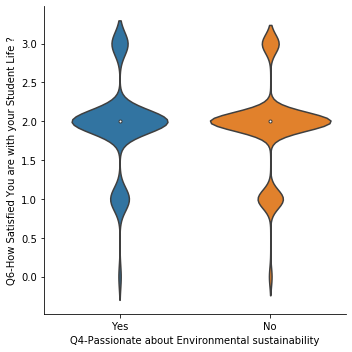

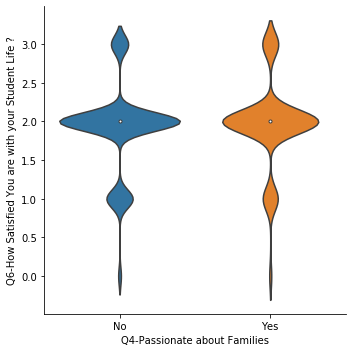

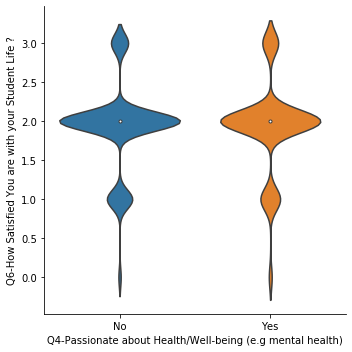

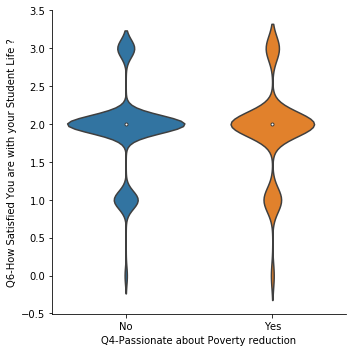

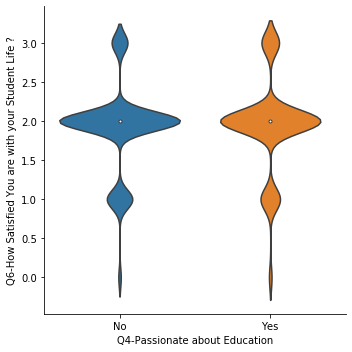

In [59]:
for i in passion_info:
    sns.catplot(x=i, y='Q6-How Satisfied You are with your Student Life ?',data=df,kind='violin')
#Violin plots are similar to boxplot, Violin plot shows the density of the data at different value nicely

In [ ]:
#This is for question dataset.

'''d=dict()
p=list(df_factors.columns)
for i in range(len(df_factors.columns)):
    l=[]
    for j in range(len(df_factors)):
        if(df_factors.iloc[j,i]=="No"):
            #df_factors.loc[j,i]=0
            l.append(0)
        else:
            #df_factors.loc[j,i]=1
            l.append(1)
    for k in range(len(p)):
        d[p[k]]=l
d=pd.DataFrame(d)'''

In [ ]:
#for responses dataset

df3=dict()
y=set(df['Career'])
q=dict()
t=1
x=[]
for i in y:
    q[i]=t
    t+=1
for i in df['Career']:
    for j in q:
        if i==j:
            x.append(q[j])
df3['Career']=x

m=[]
q=dict()
t=1
y=set(df['Gender'])
for i in y:
    q[i]=t
    t+=1
for i in df['Gender']:
    for j in q:
        if i==j:
            m.append(q[j])
df3['Gender']=m

n=[]
t=1
q=dict()
y=set(df['Nationality'])
for i in y:
    q[i]=t
    t+=1
for i in df['Nationality']:
    for j in q:
        if i==j:
            n.append(q[j])
df3['Nationality']=n

o=[]
t=1
q=dict()
y=set(df['Department'])
for i in y:
    q[i]=t
    t+=1
for i in df['Department']:
    for j in q:
        if i==j:
            o.append(q[j])
df3['Department']=o

df3['Q5-What are your levels of stress?']=df['Q5-What are your levels of stress ?']
df3['Q1-How many events have you Volunteered in ?']=df['Q1-How many events have you Volunteered in ?']
df3['Q2-How many events have you Participated in ?']=df['Q2-How many events have you Participated in ?']
df3['Q3-How many activities are you Interested in ?']=df['Q3-How many activities are you Interested in ?']
df3['Q4-How many activities are you Passionate about ?']=df['Q4-How many activities are you Passionate about ?']
df3['Q6-How Satisfied You are with your Student Life ?']=df['Q6-How Satisfied You are with your Student Life ?']
df3['Q7-How much effort do you make to interact with others ?']=df['Q7-How much effort do you make to interact with others ?']
df3['Q8-About How events are you aware about ?']=df['Q8-About How events are you aware about ?']

df3=pd.DataFrame(df3)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
x=df3.drop(["Q5-What are your levels of stress?"],axis=1)
y=df3[["Q5-What are your levels of stress?"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2,stratify=y)

clf_entropy=DecisionTreeClassifier()

clf_entropy.fit(x_train,y_train)

prediction=clf_entropy.predict(x_train)

In [ ]:
accuracy_score(y_train,prediction)